In [153]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import random
from sklearn.model_selection import KFold


# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.0269697  1.0269697  1.0269697  ... 1.0269697  1.0269697  1.0269697 ]
 [1.05393939 1.05393939 1.05393939 ... 1.05393939 1.05393939 1.05393939]
 ...
 [5.34212121 5.34212121 5.34212121 ... 5.34212121 5.34212121 5.34212121]
 [5.36909091 5.36909091 5.36909091 ... 5.36909091 5.36909091 5.36909091]
 [5.39606061 5.39606061 5.39606061 ... 5.39606061 5.39606061 5.39606061]]


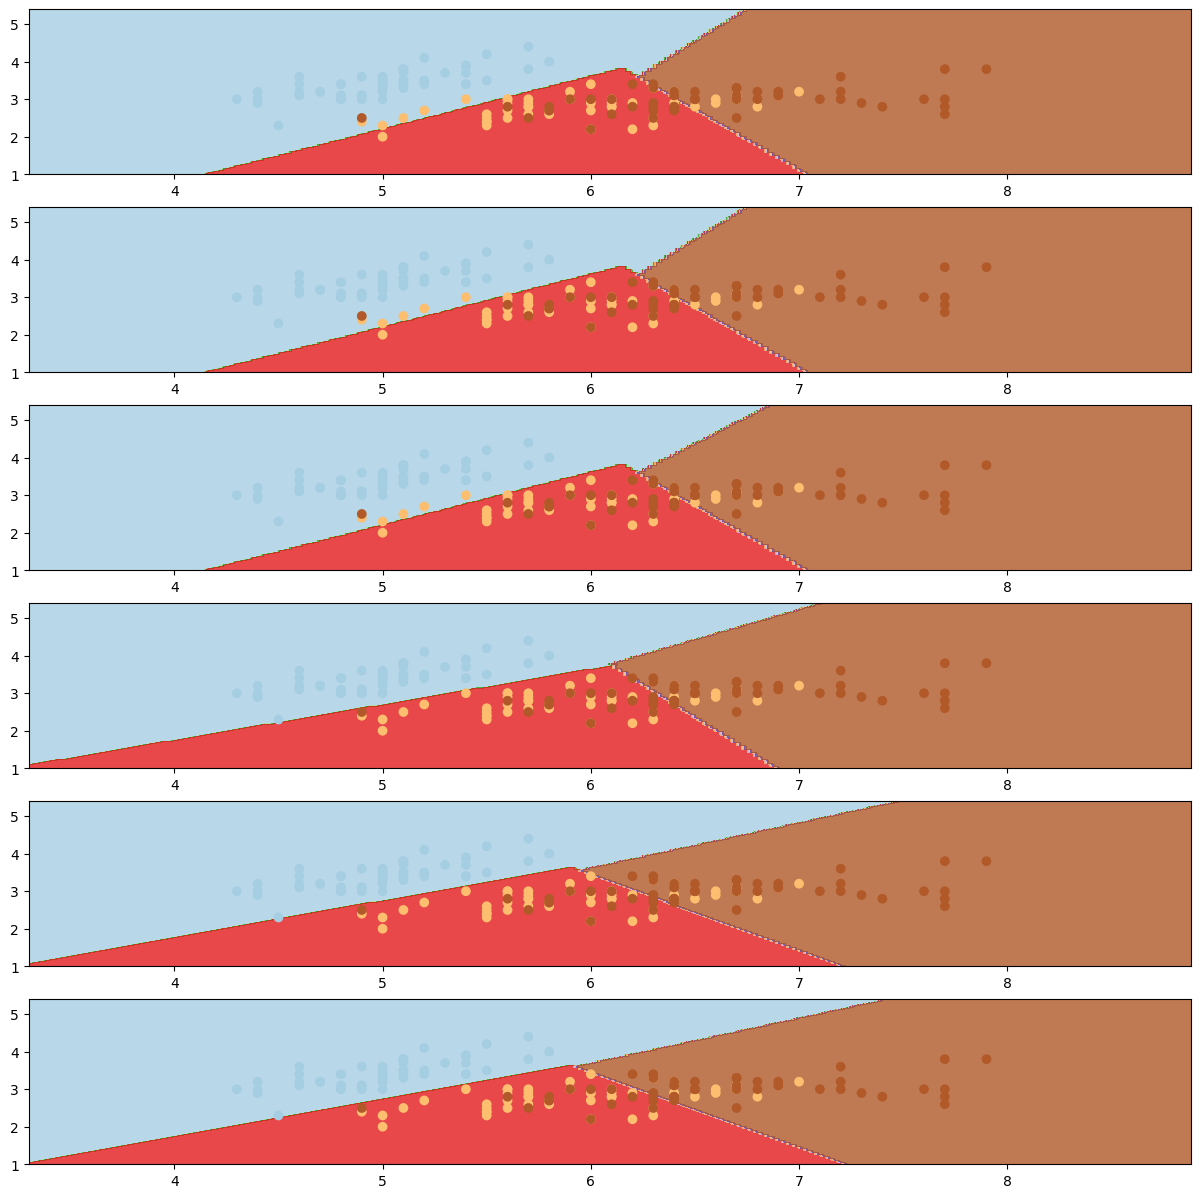

In [133]:

cvalues = [0.0001,0.001,0.01,0.1,1,10]
figure, axis = plt.subplots(len(cvalues),figsize=(15, 15))
for index, x in enumerate(cvalues):
    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 1.0 # SVM regularization parameter
    svc = svm.SVC(kernel='linear', C=x,gamma=0).fit(X, y)


    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axis[index].contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    axis[index].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.show()

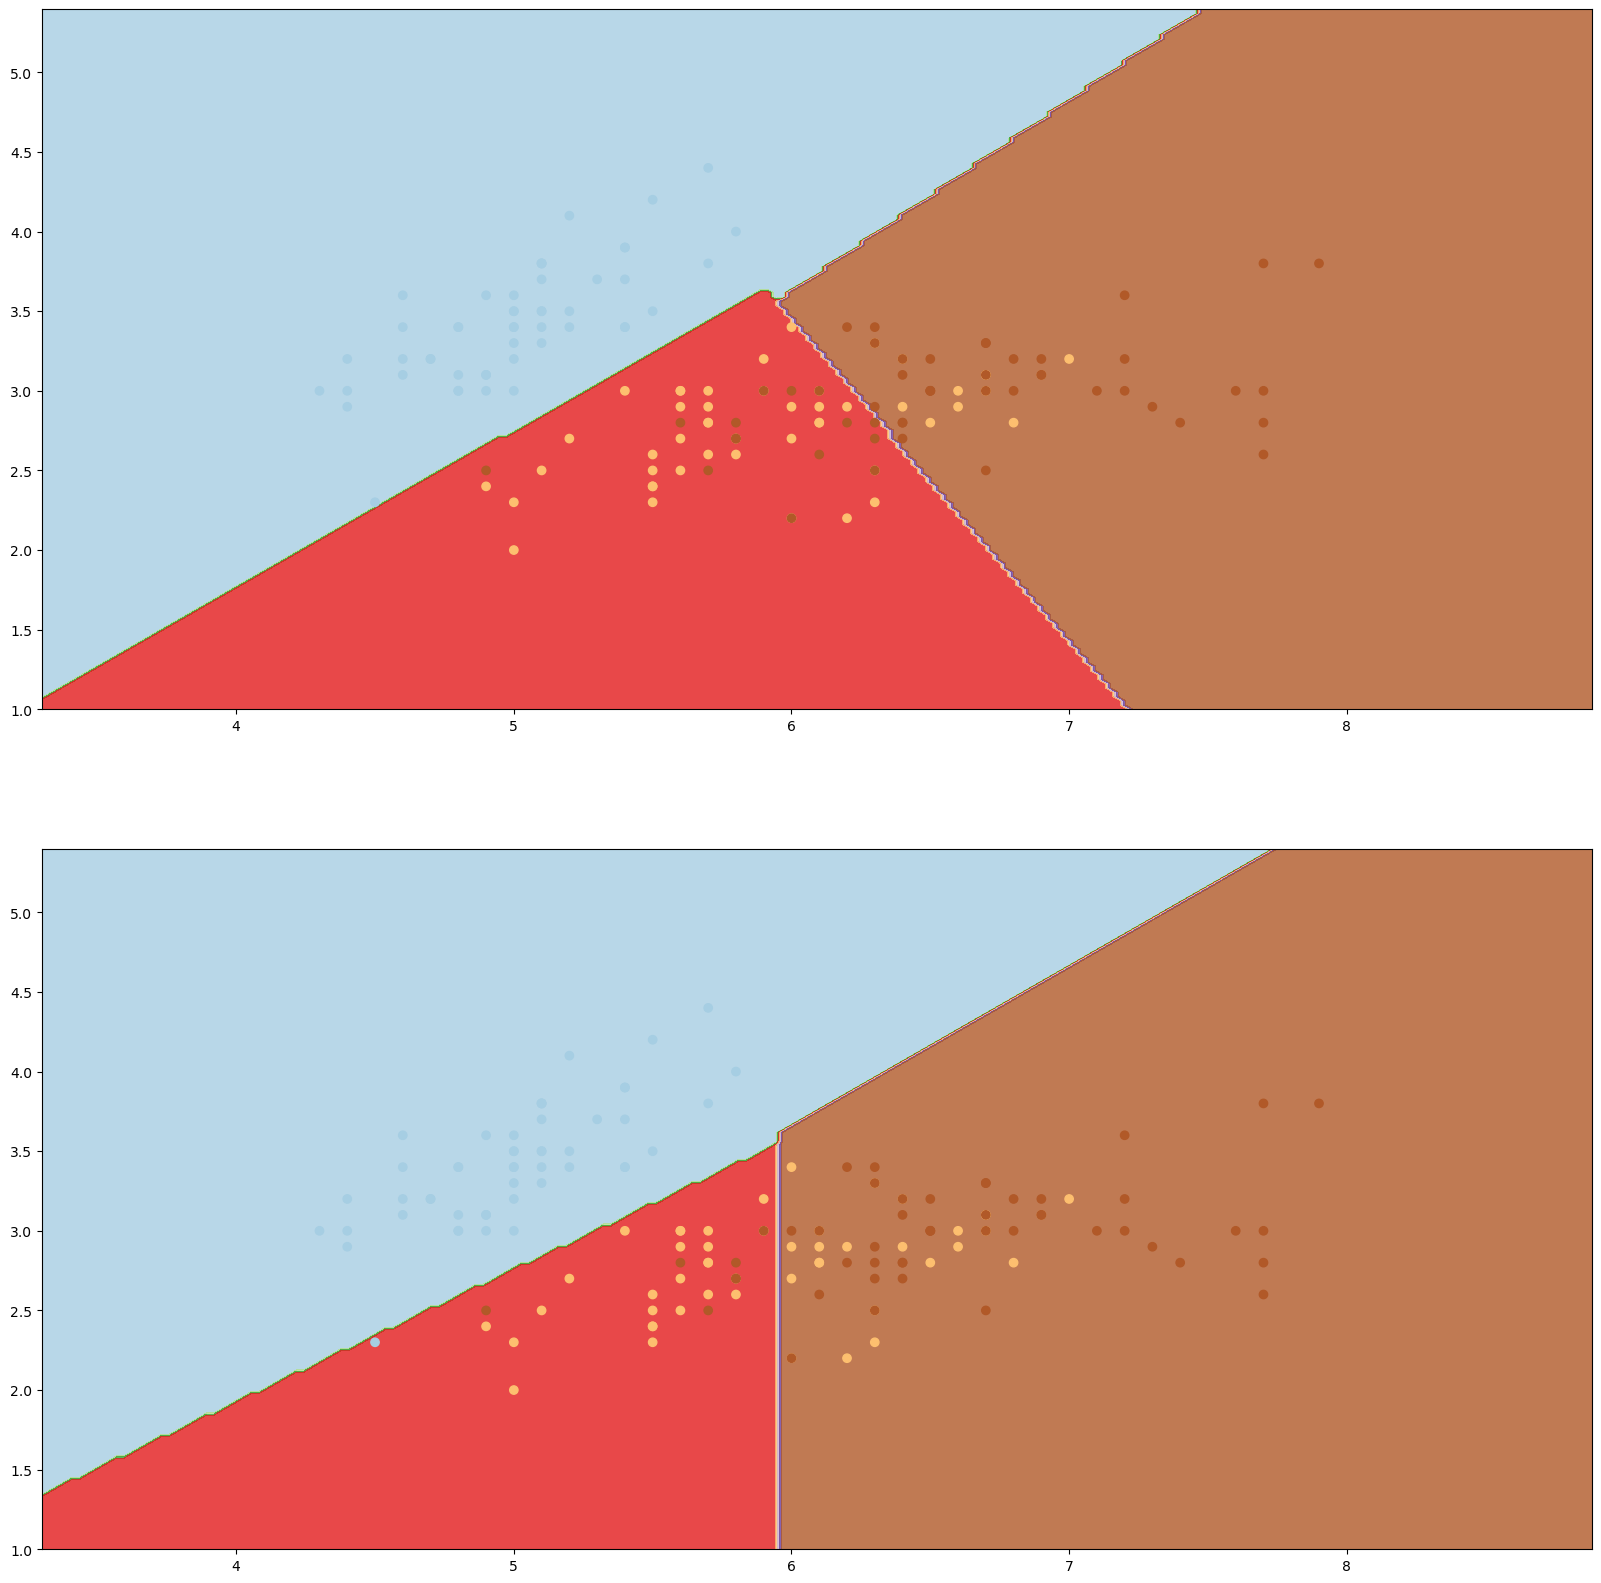

In [134]:
figure, axis = plt.subplots(2,figsize=(20, 20))



svc = svm.SVC(kernel='linear', C=1.0 ,gamma=0).fit(X, y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
axis[0].contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
axis[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

supportVectorsList = svc.support_vectors_.copy()
random.shuffle(supportVectorsList)
supportVectorsList[:len(supportVectorsList)//4]

newX = list((tuple(i) for i in X))
vectorsToRemove = list((tuple(i) for i in supportVectorsList))
newY = list(y)

for vector in vectorsToRemove:
    if vector in newX:
        index = newX.index(vector)
        newX.remove(vector)
        newY.pop(index)


svc2 = svm.SVC(kernel='linear', C=1.0 ,gamma=0).fit(newX, newY)
Z = svc2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
axis[1].contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
axis[1].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.show()

In [144]:

kf = KFold(n_splits=5)

foldedSetsIndexes = []

for train, test in kf.split(X):
    foldedSetsIndexes.append((train,test))

#print(foldedSetsIndexes)

print(foldedSetsIndexes[0])

(array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]))


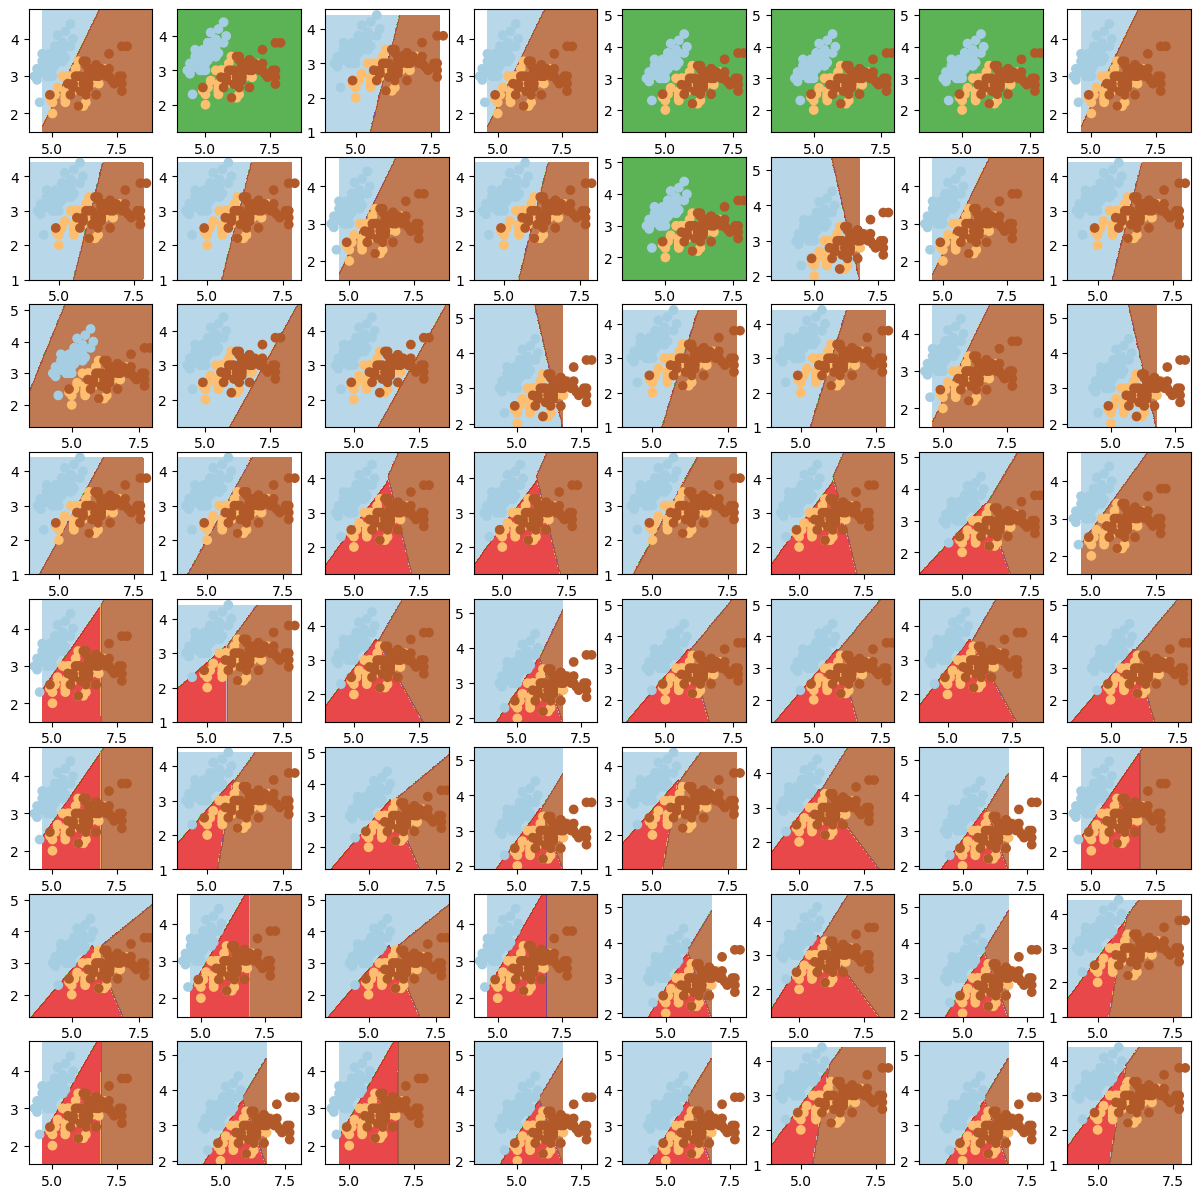

In [164]:

c_values = [pow(10, i) for i in range(-4,4)]
gamma_values = [pow(10, i) for i in range(-4,4)]

figure, axis = plt.subplots(len(c_values),len(gamma_values),figsize=(15, 15))


for row, c_val in enumerate(c_values):
    for col, gamma_val in enumerate(gamma_values):

        set = random.choice(foldedSetsIndexes)

        X_fold = [X[i] for i in set[0]]
        Y_fold = [y[i] for i in set[0]]

        X_fold_test = np.array([X[i] for i in set[1]])
        Y_fold_test = np.array([y[i] for i in set[1]])
        
        # create a mesh to plot in
        x_min_test, x_max_test = X_fold_test[:, 0].min() - 1, X_fold_test[:, 0].max() + 1
        y_min_test, y_max_test = X_fold_test[:, 1].min() - 1, X_fold_test[:, 1].max() + 1
        h_test = (x_max / x_min)/100
        xx_test, yy_test = np.meshgrid(np.arange(x_min_test, x_max_test, h_test),np.arange(y_min_test, y_max_test, h_test))

        svc = svm.SVC(kernel='linear', C=c_val, gamma=gamma_val).fit(X_fold, Y_fold)
        Z = svc.predict(np.c_[xx_test.ravel(), yy_test.ravel()]).reshape(xx_test.shape)


        axis[row][col].contourf(xx_test, yy_test, Z, cmap=plt.cm.Paired, alpha=0.8)
        axis[row][col].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.show()